In [1]:
import os
import plotly.express as px
import pandas as pd
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# def count_images_in_folders(root_folder):
#     records = []
    
#     for subset in ['train', 'test', 'val']:
#         subset_path = os.path.join(root_folder, subset)
        
#         for category in os.listdir(subset_path):
#             category_path = os.path.join(subset_path, category)
            
#             if os.path.isdir(category_path):
#                 num_images = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])
                
#                 records.append({'Category': category, 'Count': num_images, 'Dataset': subset})

#     return pd.DataFrame(records)

# root_folder = "car_make_images"
# df = count_images_in_folders(root_folder)

# # Sort and plot
# df = df.sort_values(['Dataset', 'Count'], ascending=[True, True])
# fig = px.bar(df, x='Count', y='Category', color='Dataset', orientation='h', title='Distribution of Car Makes', 
#              height=1000, width=800)
# fig.show()


In [3]:
hist = pd.read_csv('history.csv')
hist.columns = ['Epoch', 'Loss', 'Accuracy', 'f1_score', 'Val_Loss', 'Val_Accuracy', 'Val_f1_score']

In [8]:
def create_seaborn_figure(dataframe, columns, fig_name):
    print(f"Creating figure: {fig_name}")
    start_time = time.time()
    
    plt.figure(figsize=(18, 6))
    
    for col in columns:
        sns.lineplot(data=dataframe, x=dataframe.index, y=col, label=col)
    
    plt.title(fig_name.capitalize())
    plt.legend()
    
    print("Created figure, now writing...")
    plt.savefig(f"./assets/figures/{fig_name}.png")
    
    print(f"Figure {fig_name} created and written. Time taken: {time.time() - start_time}")



def update_readme():
    print("Starting to update README...")
    start_time = time.time()

    # Read existing README.md
    with open("./README.md", "r", encoding='utf-8') as f:
        content = f.read()

    # Load data
    print("Loading data...")
    hist = pd.read_csv('history.csv')
    hist.columns = ['Epoch', 'Loss', 'Accuracy', 'f1_score', 'Val_Loss', 'Val_Accuracy', 'Val_f1_score']
    
    # Create and save new Plotly figures
    figures_data = [
        {'data': hist, 'columns': ['Loss', 'Val_Loss'], 'name': 'loss'},
        {'data': hist, 'columns': ['Accuracy', 'Val_Accuracy'], 'name': 'acc'},
        {'data': hist, 'columns': ['f1_score', 'Val_f1_score'], 'name': 'f1'}
    ]
    
    figures_md = "## Métricas actuales del modelo:\n"
    for figure in figures_data:
        create_seaborn_figure(figure['data'], figure['columns'], figure['name'])
        figures_md += f"### {figure['name'].capitalize()} Plot\n"
        figures_md += f"![{figure['name'].capitalize()} Plot](./assets/figures/{figure['name']}.png)\n"

    # Use regex to replace the existing Metrics section with the new figures
    print("Updating README...")
    updated_content = re.sub(r"## Métricas actuales del modelo:.*", figures_md, content, flags=re.DOTALL)

    # Write the modified content back to README.md
    with open("./README.md", "w", encoding='utf-8') as f:
        f.write(updated_content)

    print(f"README updated. Total time taken: {time.time() - start_time}")

Starting to update README...
Loading data...
Creating figure: loss
Created figure, now writing...
Figure loss created and written. Time taken: 0.5299551486968994
Creating figure: acc
Created figure, now writing...
Figure acc created and written. Time taken: 0.25300168991088867
Creating figure: f1
Created figure, now writing...
Figure f1 created and written. Time taken: 0.23199748992919922
Updating README...
README updated. Total time taken: 1.0199830532073975


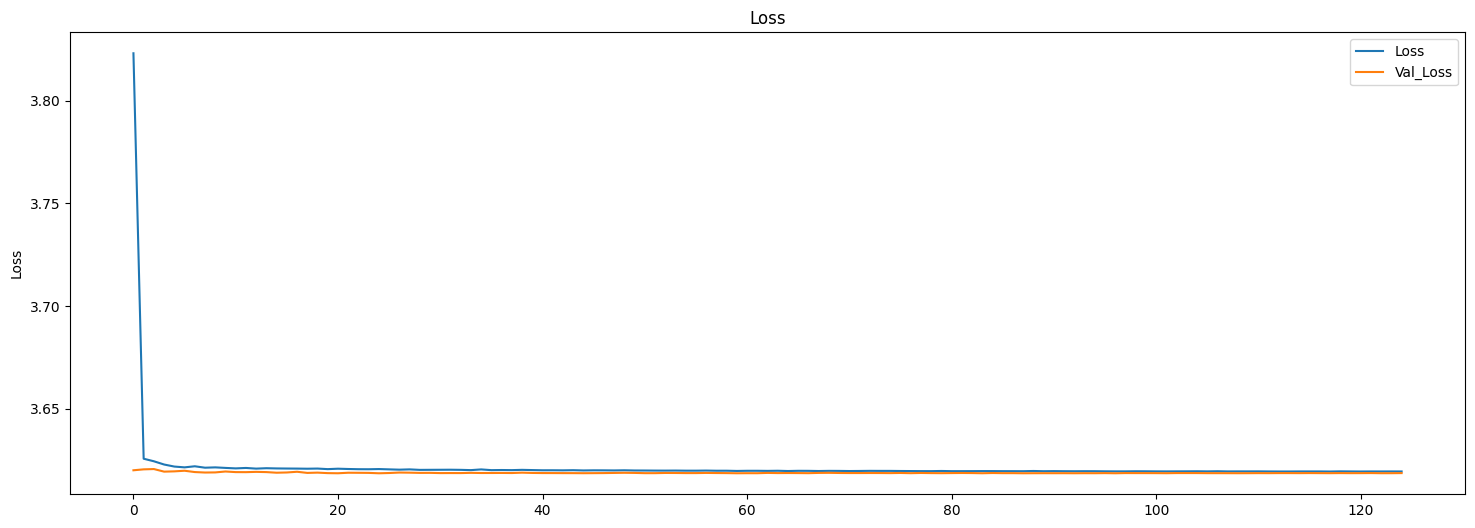

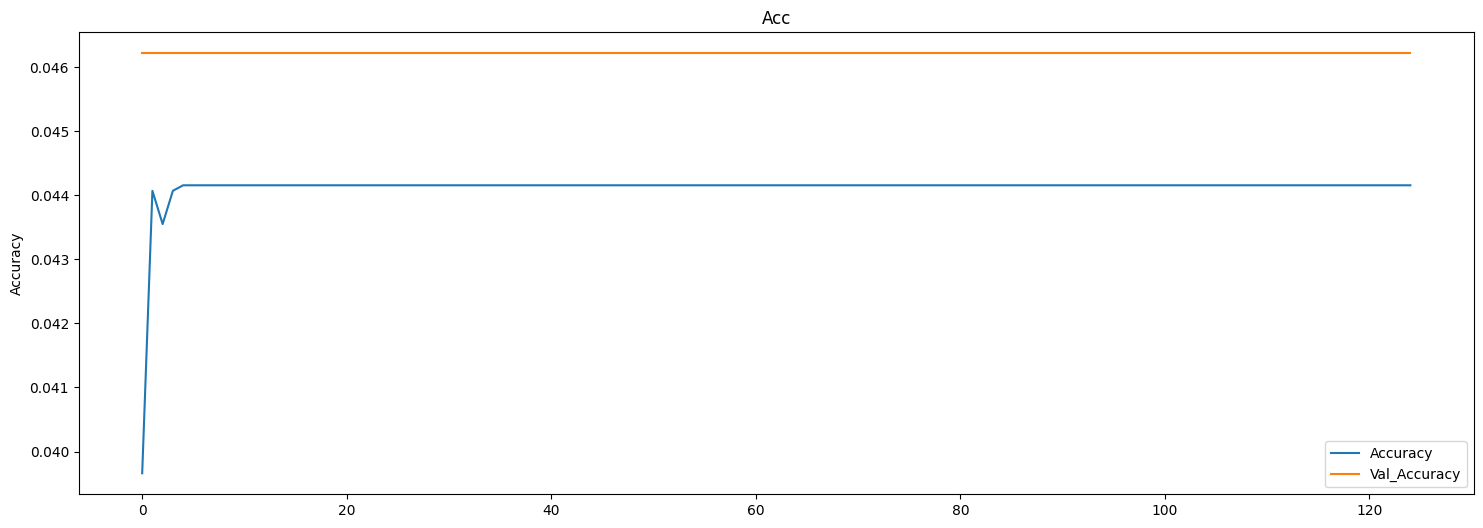

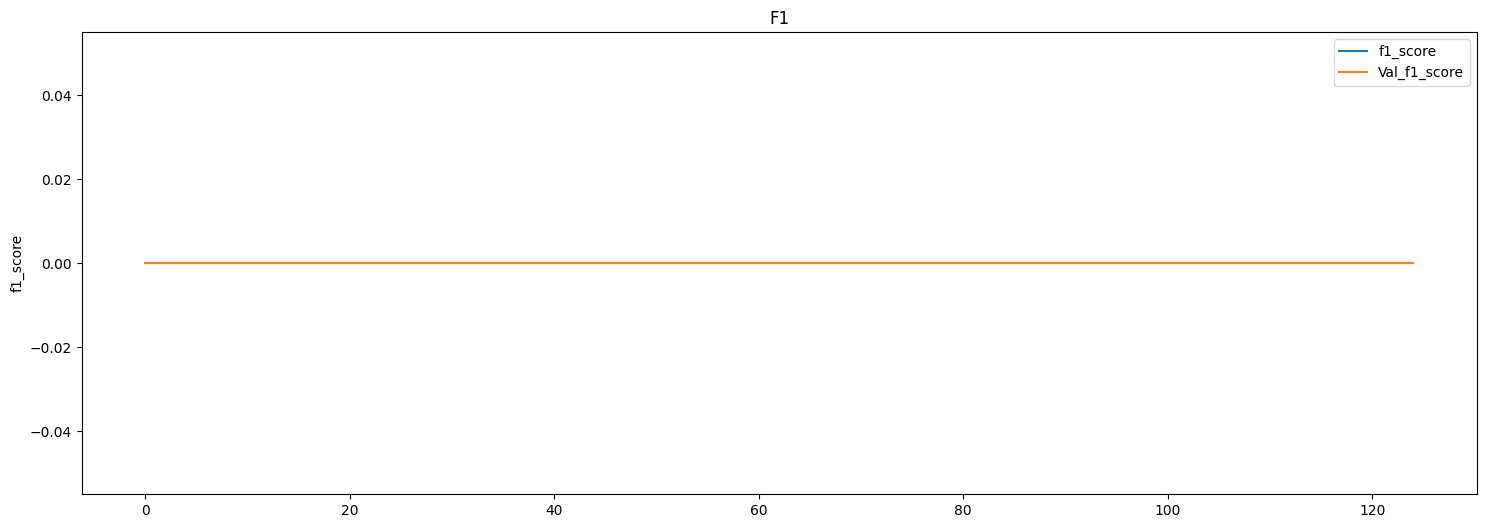

In [9]:
update_readme()